In [334]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data=pd.read_csv("../UCSD-Microgrid-Database\Data Files\BuildingLoadWithEV\HopkinsBuilding.csv")

df=pd.DataFrame(data)

df["DateTime"]=pd.to_datetime(df["DateTime"])

df = df.drop(df.index[0]).reset_index(drop=True)


In [335]:
df['mes'] = df['DateTime'].dt.month

def obtener_estacion(mes):
    if 3 <= mes <= 5:
        return 'primavera'
    elif 6 <= mes <= 8:
        return 'verano'
    elif 9 <= mes <= 11:
        return 'otoño'
    else:
        return 'invierno'

df['estacion'] = df['mes'].apply(obtener_estacion)

df['verano'] = (df['mes'] >= 6) & (df['mes'] <= 8)
df['verano'] = df['verano'].astype(int)

df['primavera'] = (df['mes'] >= 3) & (df['mes'] <= 5)
df['primavera'] = df['primavera'].astype(int)

df['otoño'] = (df['mes'] >= 9) & (df['mes'] <= 11)
df['otoño'] = df['otoño'].astype(int)

df["invierno"] = (df["mes"].isin([12, 1, 2])).astype(int)

df

,DateTime,RealPower,mes,estacion,verano,primavera,otoño,invierno
0,2019-12-31 23:45:00,38.394,12,invierno,0,0,0,1
1,2019-12-31 23:30:00,38.619,12,invierno,0,0,0,1
2,2019-12-31 23:15:00,38.577,12,invierno,0,0,0,1
3,2019-12-31 23:00:00,38.493,12,invierno,0,0,0,1
4,2019-12-31 22:45:00,38.313,12,invierno,0,0,0,1
...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4,primavera,0,1,0,0
26396,2019-04-01 00:45:00,50.980,4,primavera,0,1,0,0
26397,2019-04-01 00:30:00,51.873,4,primavera,0,1,0,0
26398,2019-04-01 00:15:00,51.186,4,primavera,0,1,0,0


In [336]:
del df["estacion"]

**vacaciones o feriados**

In [337]:
df['dia'] = df['DateTime'].dt.day
df

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia
0,2019-12-31 23:45:00,38.394,12,0,0,0,1,31
1,2019-12-31 23:30:00,38.619,12,0,0,0,1,31
2,2019-12-31 23:15:00,38.577,12,0,0,0,1,31
3,2019-12-31 23:00:00,38.493,12,0,0,0,1,31
4,2019-12-31 22:45:00,38.313,12,0,0,0,1,31
...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4,0,1,0,0,1
26396,2019-04-01 00:45:00,50.980,4,0,1,0,0,1
26397,2019-04-01 00:30:00,51.873,4,0,1,0,0,1
26398,2019-04-01 00:15:00,51.186,4,0,1,0,0,1


In [338]:
df['fecha'] = df['DateTime'].dt.date

def obtener_vaciones(fecha):

    mes_dia=fecha.strftime("%m-%d")

    if  "12-14"< mes_dia <= "12-31":
        return 1
    elif  "06-15"<= mes_dia < "09-26":
        return 1
    elif mes_dia=="11-11":
        return 1
    elif  "11-28"<= mes_dia <= "11-29":
        return 1
    elif mes_dia=="09-02":
        return 1
    elif mes_dia=="07-04":
        return 1
    elif mes_dia=="05-27":
        return 1
    else:
        return 0
    
df["vacaciones"]=df["fecha"].apply(obtener_vaciones)
df

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,fecha,vacaciones
0,2019-12-31 23:45:00,38.394,12,0,0,0,1,31,2019-12-31,1
1,2019-12-31 23:30:00,38.619,12,0,0,0,1,31,2019-12-31,1
2,2019-12-31 23:15:00,38.577,12,0,0,0,1,31,2019-12-31,1
3,2019-12-31 23:00:00,38.493,12,0,0,0,1,31,2019-12-31,1
4,2019-12-31 22:45:00,38.313,12,0,0,0,1,31,2019-12-31,1
...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4,0,1,0,0,1,2019-04-01,0
26396,2019-04-01 00:45:00,50.980,4,0,1,0,0,1,2019-04-01,0
26397,2019-04-01 00:30:00,51.873,4,0,1,0,0,1,2019-04-01,0
26398,2019-04-01 00:15:00,51.186,4,0,1,0,0,1,2019-04-01,0


**clases verano**

In [339]:
def obtener_vaciones(fecha):

    mes_dia=fecha.strftime("%m-%d")

    if  "07-01"<= mes_dia <= "08-03":
        return 1
    elif  "08-05"<= mes_dia <= "09-07":
        return 1
    else:
        return 0
    
df["clases_verano"]=df["fecha"].apply(obtener_vaciones)
df

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,fecha,vacaciones,clases_verano
0,2019-12-31 23:45:00,38.394,12,0,0,0,1,31,2019-12-31,1,0
1,2019-12-31 23:30:00,38.619,12,0,0,0,1,31,2019-12-31,1,0
2,2019-12-31 23:15:00,38.577,12,0,0,0,1,31,2019-12-31,1,0
3,2019-12-31 23:00:00,38.493,12,0,0,0,1,31,2019-12-31,1,0
4,2019-12-31 22:45:00,38.313,12,0,0,0,1,31,2019-12-31,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4,0,1,0,0,1,2019-04-01,0,0
26396,2019-04-01 00:45:00,50.980,4,0,1,0,0,1,2019-04-01,0,0
26397,2019-04-01 00:30:00,51.873,4,0,1,0,0,1,2019-04-01,0,0
26398,2019-04-01 00:15:00,51.186,4,0,1,0,0,1,2019-04-01,0,0


**excel de temperatura**

In [340]:
temp=pd.read_csv("../data.csv",sep=";")

temp = pd.DataFrame(temp)

temp["Date"] = pd.to_datetime(temp["Date"], format="%d/%m/%Y")

temp

,Date,Min Temp (C),Max Temp (C),Avg Temp (C)
0,1939-07-01,17.20,24.40,20.80
1,1939-07-02,18.30,23.30,20.80
2,1939-07-03,16.70,21.70,19.20
3,1939-07-04,17.20,21.70,19.45
4,1939-07-05,17.80,22.20,20.00
...,...,...,...,...
29399,2019-12-27,6.67,16.67,11.67
29400,2019-12-28,7.22,16.67,11.94
29401,2019-12-29,7.22,17.22,12.22
29402,2019-12-30,10.00,17.78,13.89


In [341]:
temp["Date"]=pd.to_datetime(temp["Date"])

temp = temp.rename(columns={'Date': 'Fecha'})

temp = temp[(temp['Fecha'] < '1939-07-01') | (temp['Fecha'] >= '2019-01-01')]

temp

,Fecha,Min Temp (C),Max Temp (C),Avg Temp (C)
29039,2019-01-01,7.20,16.10,11.65
29040,2019-01-02,5.00,16.70,10.85
29041,2019-01-03,5.60,17.80,11.70
29042,2019-01-04,6.10,17.20,11.65
29043,2019-01-05,10.00,16.10,13.05
...,...,...,...,...
29399,2019-12-27,6.67,16.67,11.67
29400,2019-12-28,7.22,16.67,11.94
29401,2019-12-29,7.22,17.22,12.22
29402,2019-12-30,10.00,17.78,13.89


**duración de días**

In [342]:
sol=pd.read_csv("../data_sunrise\sunrise.csv",sep=";")
sol = pd.DataFrame(sol)

sol['Sunrise'] = sol['Sunrise'].str.extract('(\d+:\d+ [apmAPM]+)')
sol['Sunset'] = sol['Sunset'].str.extract('(\d+:\d+ [apmAPM]+)')
sol

,Fecha,Sunrise,Sunset,Length
0,1/12/2019,6:32 am,4:42 pm,10:09:36
1,2/12/2019,6:33 am,4:42 pm,10:08:41
2,3/12/2019,6:34 am,4:42 pm,10:07:49
3,4/12/2019,6:35 am,4:42 pm,10:06:59
4,5/12/2019,6:36 am,4:42 pm,10:06:12
...,...,...,...,...
360,27/01/2019,6:46 am,5:16 pm,10:30:05
361,28/01/2019,6:45 am,5:17 pm,10:31:35
362,29/01/2019,6:45 am,5:18 pm,10:33:07
363,30/01/2019,6:44 am,5:19 pm,10:34:40


In [343]:
df = df.rename(columns={'fecha': 'Fecha'})

df

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano
0,2019-12-31 23:45:00,38.394,12,0,0,0,1,31,2019-12-31,1,0
1,2019-12-31 23:30:00,38.619,12,0,0,0,1,31,2019-12-31,1,0
2,2019-12-31 23:15:00,38.577,12,0,0,0,1,31,2019-12-31,1,0
3,2019-12-31 23:00:00,38.493,12,0,0,0,1,31,2019-12-31,1,0
4,2019-12-31 22:45:00,38.313,12,0,0,0,1,31,2019-12-31,1,0
...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4,0,1,0,0,1,2019-04-01,0,0
26396,2019-04-01 00:45:00,50.980,4,0,1,0,0,1,2019-04-01,0,0
26397,2019-04-01 00:30:00,51.873,4,0,1,0,0,1,2019-04-01,0,0
26398,2019-04-01 00:15:00,51.186,4,0,1,0,0,1,2019-04-01,0,0


In [344]:
sol['Fecha'] = pd.to_datetime(sol['Fecha'], dayfirst=True)
sol

,Fecha,Sunrise,Sunset,Length
0,2019-12-01,6:32 am,4:42 pm,10:09:36
1,2019-12-02,6:33 am,4:42 pm,10:08:41
2,2019-12-03,6:34 am,4:42 pm,10:07:49
3,2019-12-04,6:35 am,4:42 pm,10:06:59
4,2019-12-05,6:36 am,4:42 pm,10:06:12
...,...,...,...,...
360,2019-01-27,6:46 am,5:16 pm,10:30:05
361,2019-01-28,6:45 am,5:17 pm,10:31:35
362,2019-01-29,6:45 am,5:18 pm,10:33:07
363,2019-01-30,6:44 am,5:19 pm,10:34:40


In [345]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

df_combinado = pd.merge(df, temp, on='Fecha', how="outer")

df_combinado = pd.DataFrame(df_combinado)

df_combinado['Fecha'] = pd.to_datetime(df_combinado['Fecha'])

sol['Fecha'] = pd.to_datetime(sol['Fecha'])

df_mix=pd.merge(df_combinado, sol, on='Fecha', how="outer")

df_mix

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26485,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-27,NaN,NaN,13.90,19.40,16.65,6:43 am,7:05 pm,12:21:45
26486,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-28,NaN,NaN,13.90,20.00,16.95,6:42 am,7:05 pm,12:23:46
26487,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-29,NaN,NaN,12.20,19.40,15.80,6:40 am,7:06 pm,12:25:47
26488,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-30,NaN,NaN,12.20,21.70,16.95,6:39 am,7:07 pm,12:27:48


In [346]:
df_mix = df_mix.dropna(subset=['DateTime'])
df_mix

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48


In [347]:
df_mix['Hay_Sol'] = ((df_mix['Sunrise'] <= df_mix['DateTime']) & (df_mix['DateTime'] <= df_mix['Sunset'])).astype(int)
df_mix

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\4059696464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['Hay_Sol'] = ((df_mix['Sunrise'] <= df_mix['DateTime']) & (df_mix['DateTime'] <= df_mix['Sunset'])).astype(int)


,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length,Hay_Sol
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05,0
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05,0
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05,0
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05,0
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48,0
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48,0
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48,0
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48,0


In [348]:
def convertir_hora(hora_str):

    partes = hora_str.split()
    
    if len(partes) == 2:
        hora, indicador = partes
        if indicador.lower() == 'am':
            return hora
        
        elif indicador.lower() == 'pm':
            horas, minutos = map(int, hora.split(':'))
            horas += 12
            return f"{horas:02d}:{minutos}"
    
    return hora_str

df_mix['Sunrise'] = df_mix['Sunrise'].apply(convertir_hora)
df_mix['Sunset'] = df_mix['Sunset'].apply(convertir_hora)

df_mix['Sunrise'] = pd.to_datetime(df_mix['Sunrise'], format='%H:%M').dt.time
df_mix['Sunset'] = pd.to_datetime(df_mix['Sunset'], format='%H:%M').dt.time

df_mix

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1465794721.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['Sunrise'] = df_mix['Sunrise'].apply(convertir_hora)
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1465794721.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['Sunset'] = df_mix['Sunset'].apply(convertir_hora)
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1465794721.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length,Hay_Sol
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,0
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,0
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,0
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,0
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,0
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,0
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,0
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,0


In [349]:

df_mix['Sunrise'] = pd.to_datetime(df_mix['Sunrise'].apply(lambda x: x.strftime('%H:%M:%S')), format='%H:%M:%S')

df_mix['mitad_dia'] = pd.to_timedelta(df_mix['Length']) / 2

df_mix['suma_final'] = df_mix['Sunrise'] + df_mix['mitad_dia']

df_mix['suma_final'] = df_mix.apply(lambda row: row['suma_final'] + pd.Timedelta(seconds=30) if row['suma_final'].second != 0 else row['suma_final'], axis=1)

df_mix['Sunrise'] = df_mix['Sunrise'].dt.strftime('%H:%M:%S')

df_mix['suma_final'] = df_mix['suma_final'].dt.strftime('%H:%M:%S')

del df_mix["mitad_dia"]
del df_mix["Length"]

df_mix

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\2261064534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['Sunrise'] = pd.to_datetime(df_mix['Sunrise'].apply(lambda x: x.strftime('%H:%M:%S')), format='%H:%M:%S')
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\2261064534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['mitad_dia'] = pd.to_timedelta(df_mix['Length']) / 2
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\2261064534.py:5: SettingWithCopyWarning: 
A value is t

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Hay_Sol,suma_final
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24


In [350]:
from datetime import datetime, timedelta
import pandas as pd


df_mix["Date"] = pd.to_datetime(df_mix["DateTime"], format="%Y-%m-%d %H:%M:%S")
df_mix["Sunrise"] = pd.to_datetime(df_mix["Sunrise"], format="%H:%M:%S").dt.time
df_mix["Sunset"] = pd.to_datetime(df_mix["Sunset"], format="%H:%M:%S").dt.time
df_mix["suma_final"] = pd.to_datetime(df_mix["suma_final"], format="%H:%M:%S").dt.time

def determine_temp(row):
    current_time = row["Date"].time()
    sunrise_time = row["Sunrise"]
    suma_final_time_minus_30 = (datetime.combine(datetime.today(), row["suma_final"]) - timedelta(minutes=30)).time()
    suma_final_time_plus_30 = (datetime.combine(datetime.today(), row["suma_final"]) + timedelta(minutes=30)).time()
    sunset_time = row["Sunset"]

    if sunrise_time < current_time < suma_final_time_minus_30:
        return row["Avg Temp (C)"]
    
    elif suma_final_time_minus_30 <= current_time <= suma_final_time_plus_30:
        return row["Max Temp (C)"]
    
    elif suma_final_time_plus_30 < current_time < sunset_time:
        return row["Avg Temp (C)"]
    
    else:
        return row["Min Temp (C)"]

df_mix.loc[:, "temp"] = df_mix.apply(lambda row: determine_temp(row), axis=1)

df_mix



C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\34483040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Date"] = pd.to_datetime(df_mix["DateTime"], format="%Y-%m-%d %H:%M:%S")
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\34483040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Sunrise"] = pd.to_datetime(df_mix["Sunrise"], format="%H:%M:%S").dt.time
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\34483040.py:7: SettingWithCopyWarning: 
A value is trying to be set on

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Hay_Sol,suma_final,Date,temp
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32,2019-12-31 23:45:00,8.89
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32,2019-12-31 23:30:00,8.89
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32,2019-12-31 23:15:00,8.89
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32,2019-12-31 23:00:00,8.89
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,2019-12-31,1.0,0.0,8.89,23.33,16.11,06:50:00,16:52:00,0,11:51:32,2019-12-31 22:45:00,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24,2019-04-01 01:00:00,16.10
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24,2019-04-01 00:45:00,16.10
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24,2019-04-01 00:30:00,16.10
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,2019-04-01,0.0,0.0,16.10,25.60,20.85,06:36:00,19:08:00,0,12:52:24,2019-04-01 00:15:00,16.10


In [351]:
del df_mix["Min Temp (C)"]
del df_mix["Max Temp (C)"]
del df_mix["Avg Temp (C)"]
del df_mix["Sunrise"]
del df_mix["Sunset"]
del df_mix["suma_final"]
del df_mix["Date"]
del df_mix["Fecha"]

In [352]:
df_mix.to_csv("df_mix.csv")

**nuevo**

In [353]:
df_mix.to_csv('df_mix.csv', index=False)
df_mix

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10


**por horas**

In [354]:
df_2019_dec=pd.DataFrame()

for i in range(len(data)):
    if i <= 2975:
        df_2019_dec = pd.concat([df_2019_dec, df_mix.iloc[[i]]])


df_dec_diax=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if 2015<i<2112:
        df_dec_diax = pd.concat([df_dec_diax, df.iloc[[i]]])

df_dec_diax

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano
2016,2019-12-10 23:45:00,40.183,12,0,0,0,1,10,2019-12-10,0,0
2017,2019-12-10 23:30:00,40.647,12,0,0,0,1,10,2019-12-10,0,0
2018,2019-12-10 23:15:00,39.509,12,0,0,0,1,10,2019-12-10,0,0
2019,2019-12-10 23:00:00,39.677,12,0,0,0,1,10,2019-12-10,0,0
2020,2019-12-10 22:45:00,38.017,12,0,0,0,1,10,2019-12-10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2107,2019-12-10 01:00:00,40.585,12,0,0,0,1,10,2019-12-10,0,0
2108,2019-12-10 00:45:00,40.387,12,0,0,0,1,10,2019-12-10,0,0
2109,2019-12-10 00:30:00,40.851,12,0,0,0,1,10,2019-12-10,0,0
2110,2019-12-10 00:15:00,40.868,12,0,0,0,1,10,2019-12-10,0,0


In [355]:
df_2019_dec

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...
2971,2019-12-01 01:00:00,39.238,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44
2972,2019-12-01 00:45:00,39.165,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44
2973,2019-12-01 00:30:00,38.993,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44
2974,2019-12-01 00:15:00,38.918,12.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,9.44


In [356]:
df_dec_diay=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if 2111<i<2208:
        df_dec_diay = pd.concat([df_dec_diay, df.iloc[[i]]])

df_dec_diay

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano
2112,2019-12-09 23:45:00,40.454,12,0,0,0,1,9,2019-12-09,0,0
2113,2019-12-09 23:30:00,40.929,12,0,0,0,1,9,2019-12-09,0,0
2114,2019-12-09 23:15:00,41.174,12,0,0,0,1,9,2019-12-09,0,0
2115,2019-12-09 23:00:00,41.488,12,0,0,0,1,9,2019-12-09,0,0
2116,2019-12-09 22:45:00,41.655,12,0,0,0,1,9,2019-12-09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2203,2019-12-09 01:00:00,40.665,12,0,0,0,1,9,2019-12-09,0,0
2204,2019-12-09 00:45:00,40.209,12,0,0,0,1,9,2019-12-09,0,0
2205,2019-12-09 00:30:00,40.984,12,0,0,0,1,9,2019-12-09,0,0
2206,2019-12-09 00:15:00,41.014,12,0,0,0,1,9,2019-12-09,0,0


In [357]:
df_dec_diaz=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if 191<i<288:
        df_dec_diaz = pd.concat([df_dec_diaz, df.iloc[[i]]])

df_dec_diaz

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano
192,2019-12-29 23:45:00,38.634,12,0,0,0,1,29,2019-12-29,1,0
193,2019-12-29 23:30:00,38.717,12,0,0,0,1,29,2019-12-29,1,0
194,2019-12-29 23:15:00,38.806,12,0,0,0,1,29,2019-12-29,1,0
195,2019-12-29 23:00:00,38.613,12,0,0,0,1,29,2019-12-29,1,0
196,2019-12-29 22:45:00,38.465,12,0,0,0,1,29,2019-12-29,1,0
...,...,...,...,...,...,...,...,...,...,...,...
283,2019-12-29 01:00:00,38.635,12,0,0,0,1,29,2019-12-29,1,0
284,2019-12-29 00:45:00,38.781,12,0,0,0,1,29,2019-12-29,1,0
285,2019-12-29 00:30:00,38.598,12,0,0,0,1,29,2019-12-29,1,0
286,2019-12-29 00:15:00,38.592,12,0,0,0,1,29,2019-12-29,1,0


In [358]:
df_dec_diaa=pd.DataFrame()

for i in range(len(df_2019_dec)):
    if 2495<i<2592:
        df_dec_diaa = pd.concat([df_dec_diaa, df.iloc[[i]]])

df_dec_diaa

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano
2496,2019-12-05 23:45:00,42.652,12,0,0,0,1,5,2019-12-05,0,0
2497,2019-12-05 23:30:00,41.596,12,0,0,0,1,5,2019-12-05,0,0
2498,2019-12-05 23:15:00,42.506,12,0,0,0,1,5,2019-12-05,0,0
2499,2019-12-05 23:00:00,42.150,12,0,0,0,1,5,2019-12-05,0,0
2500,2019-12-05 22:45:00,42.206,12,0,0,0,1,5,2019-12-05,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2587,2019-12-05 01:00:00,41.377,12,0,0,0,1,5,2019-12-05,0,0
2588,2019-12-05 00:45:00,41.362,12,0,0,0,1,5,2019-12-05,0,0
2589,2019-12-05 00:30:00,41.933,12,0,0,0,1,5,2019-12-05,0,0
2590,2019-12-05 00:15:00,42.079,12,0,0,0,1,5,2019-12-05,0,0


Text(0, 0.5, 'RealPower')

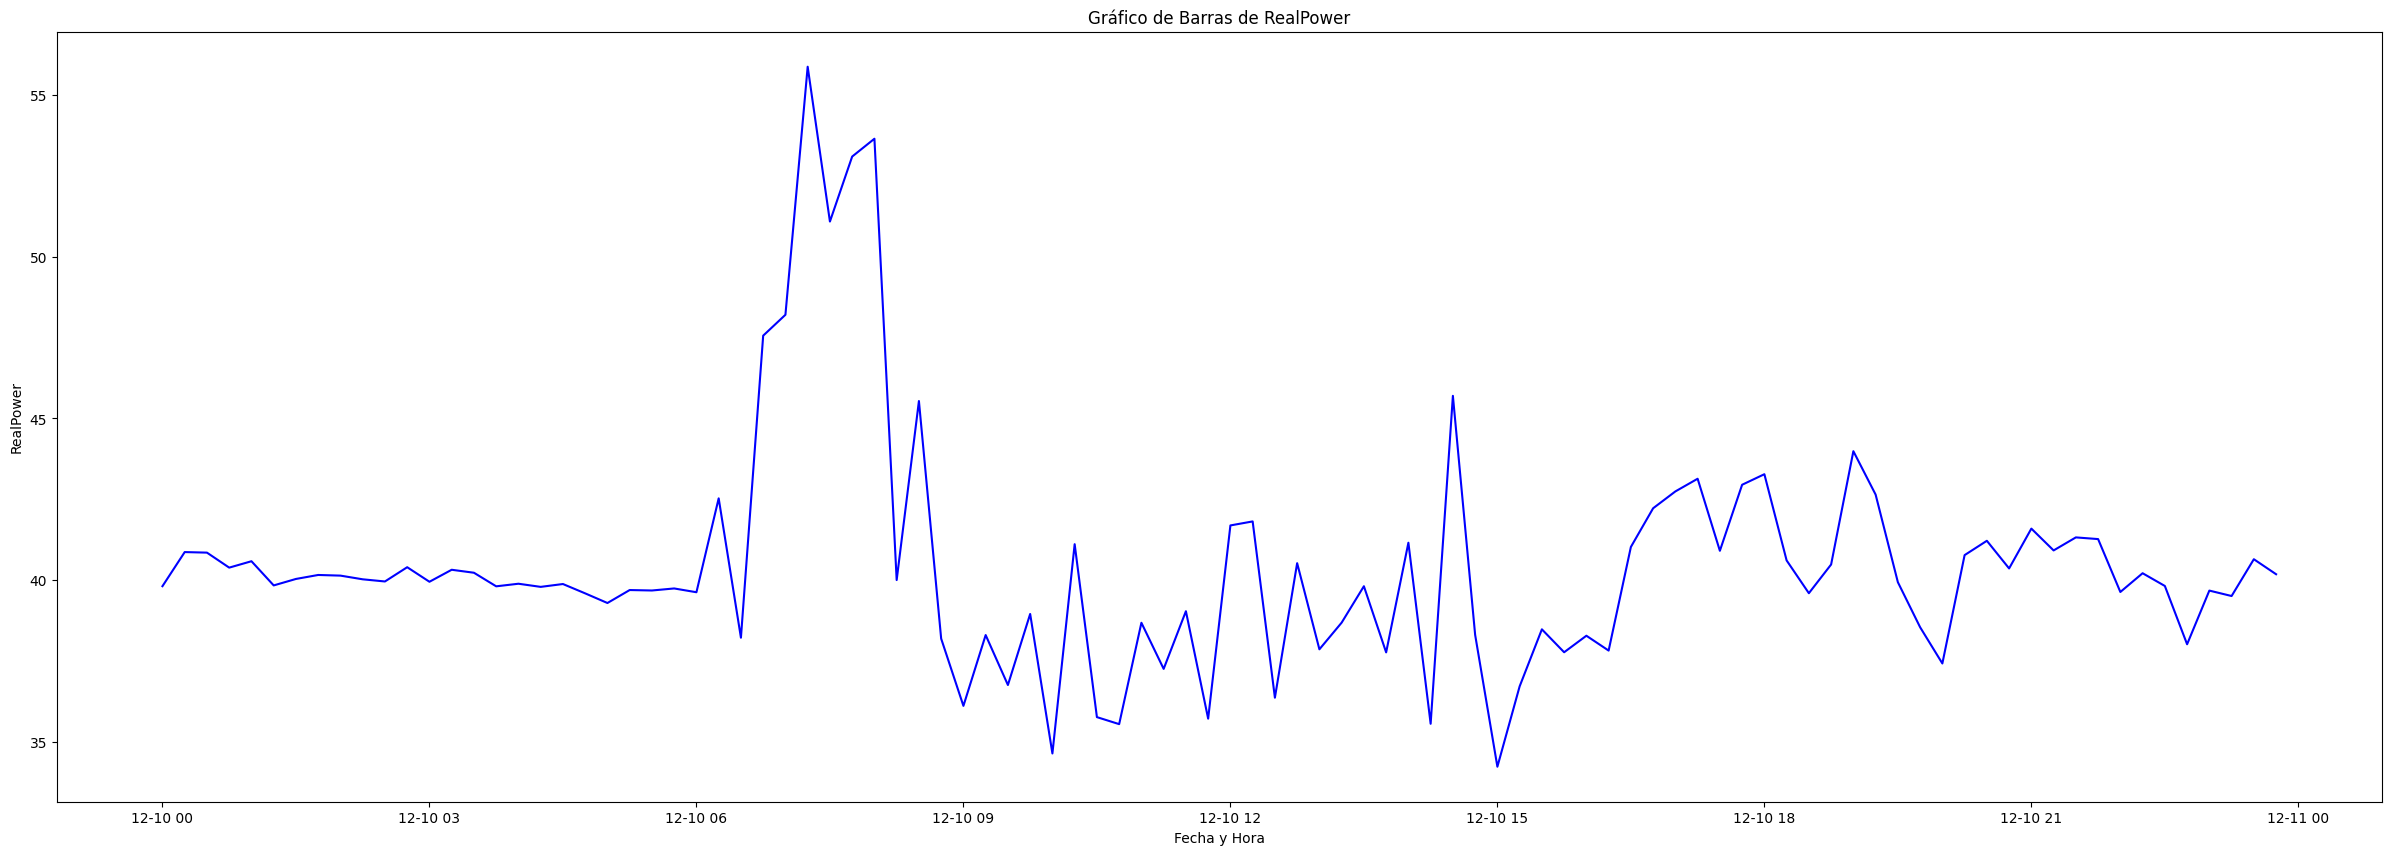

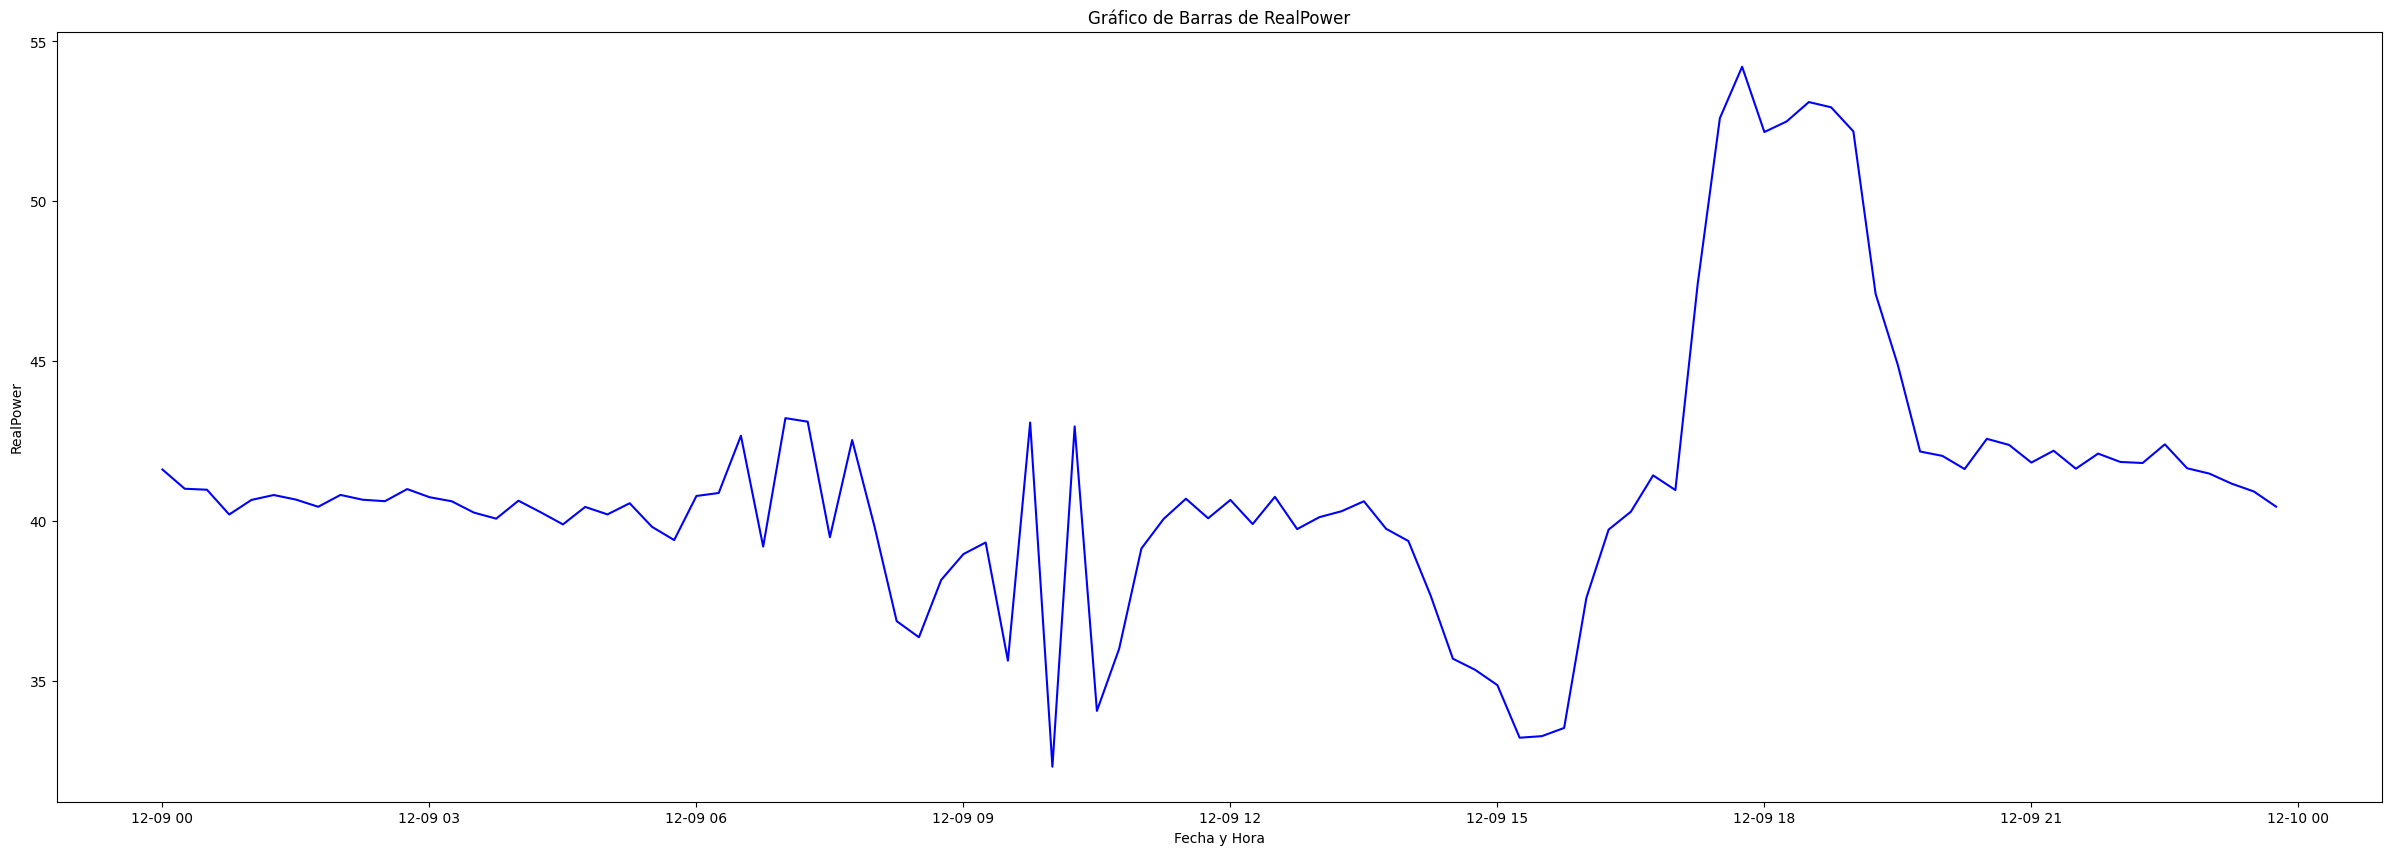

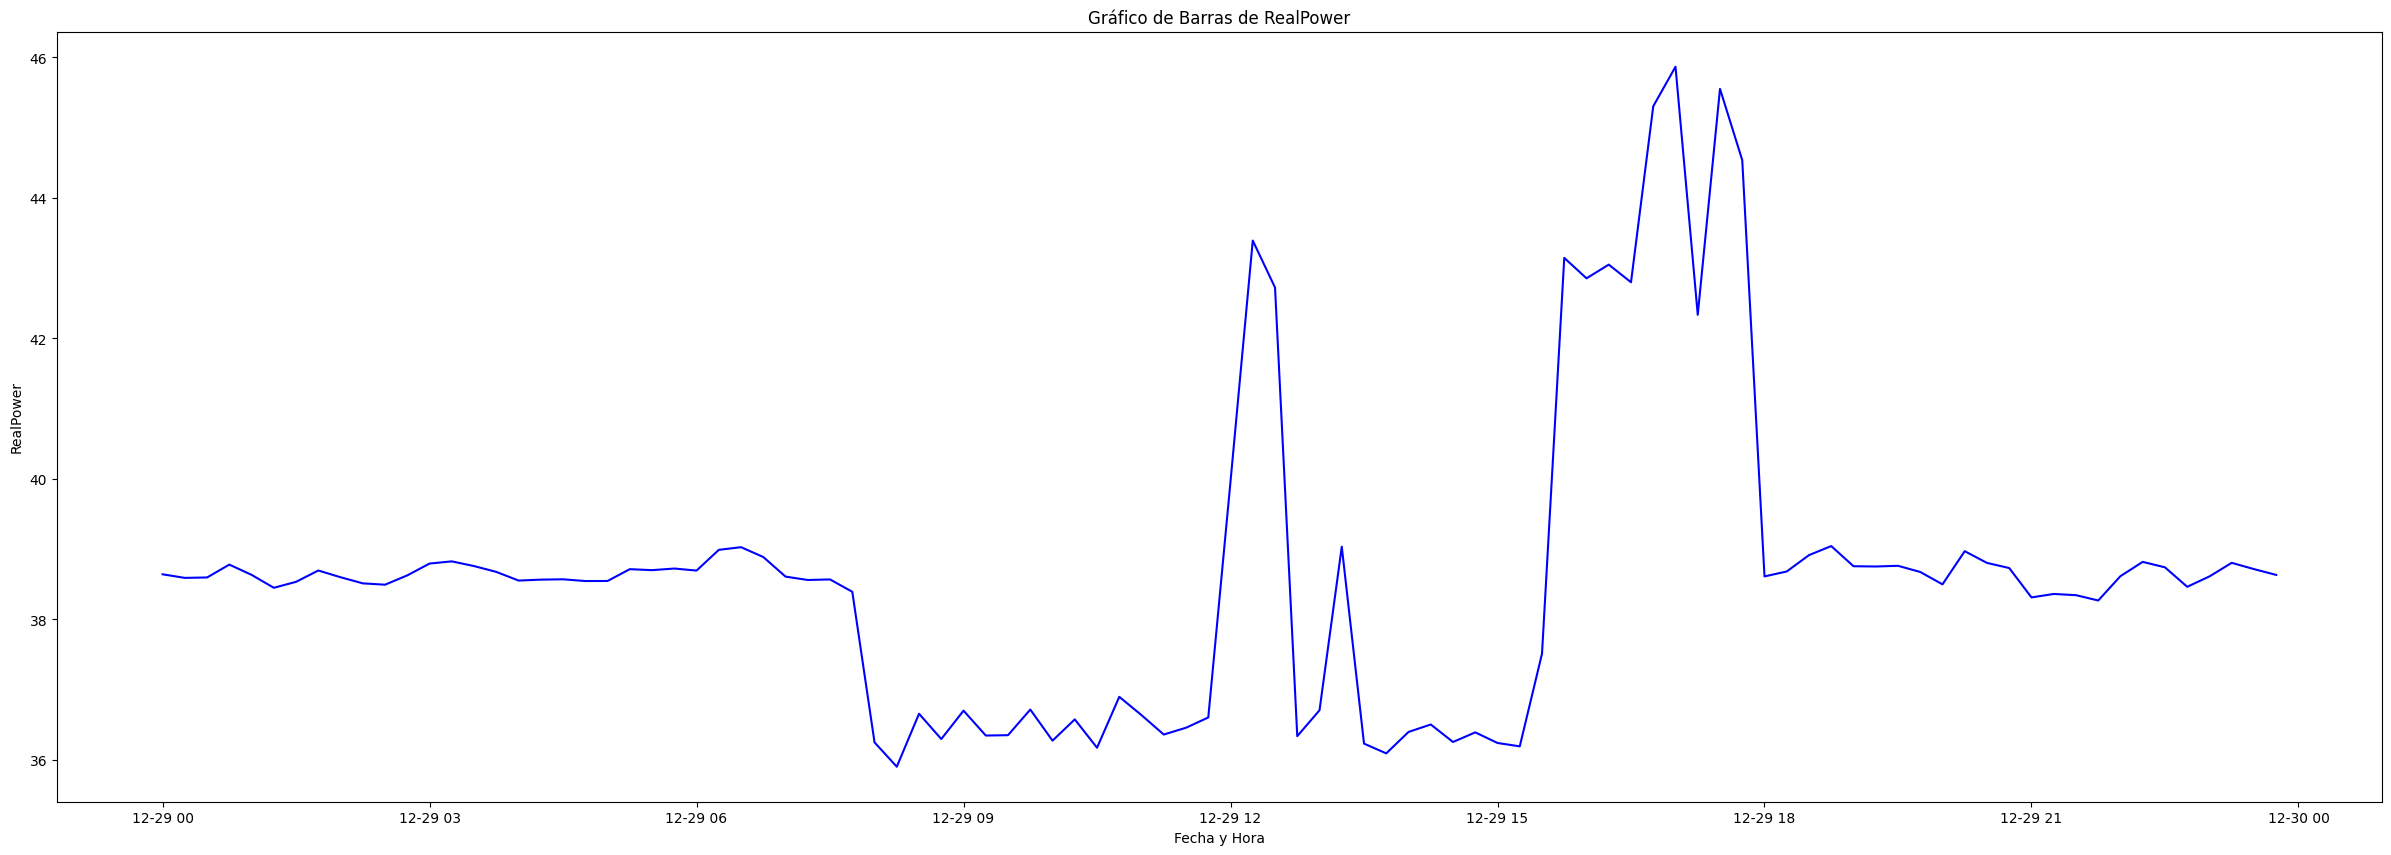

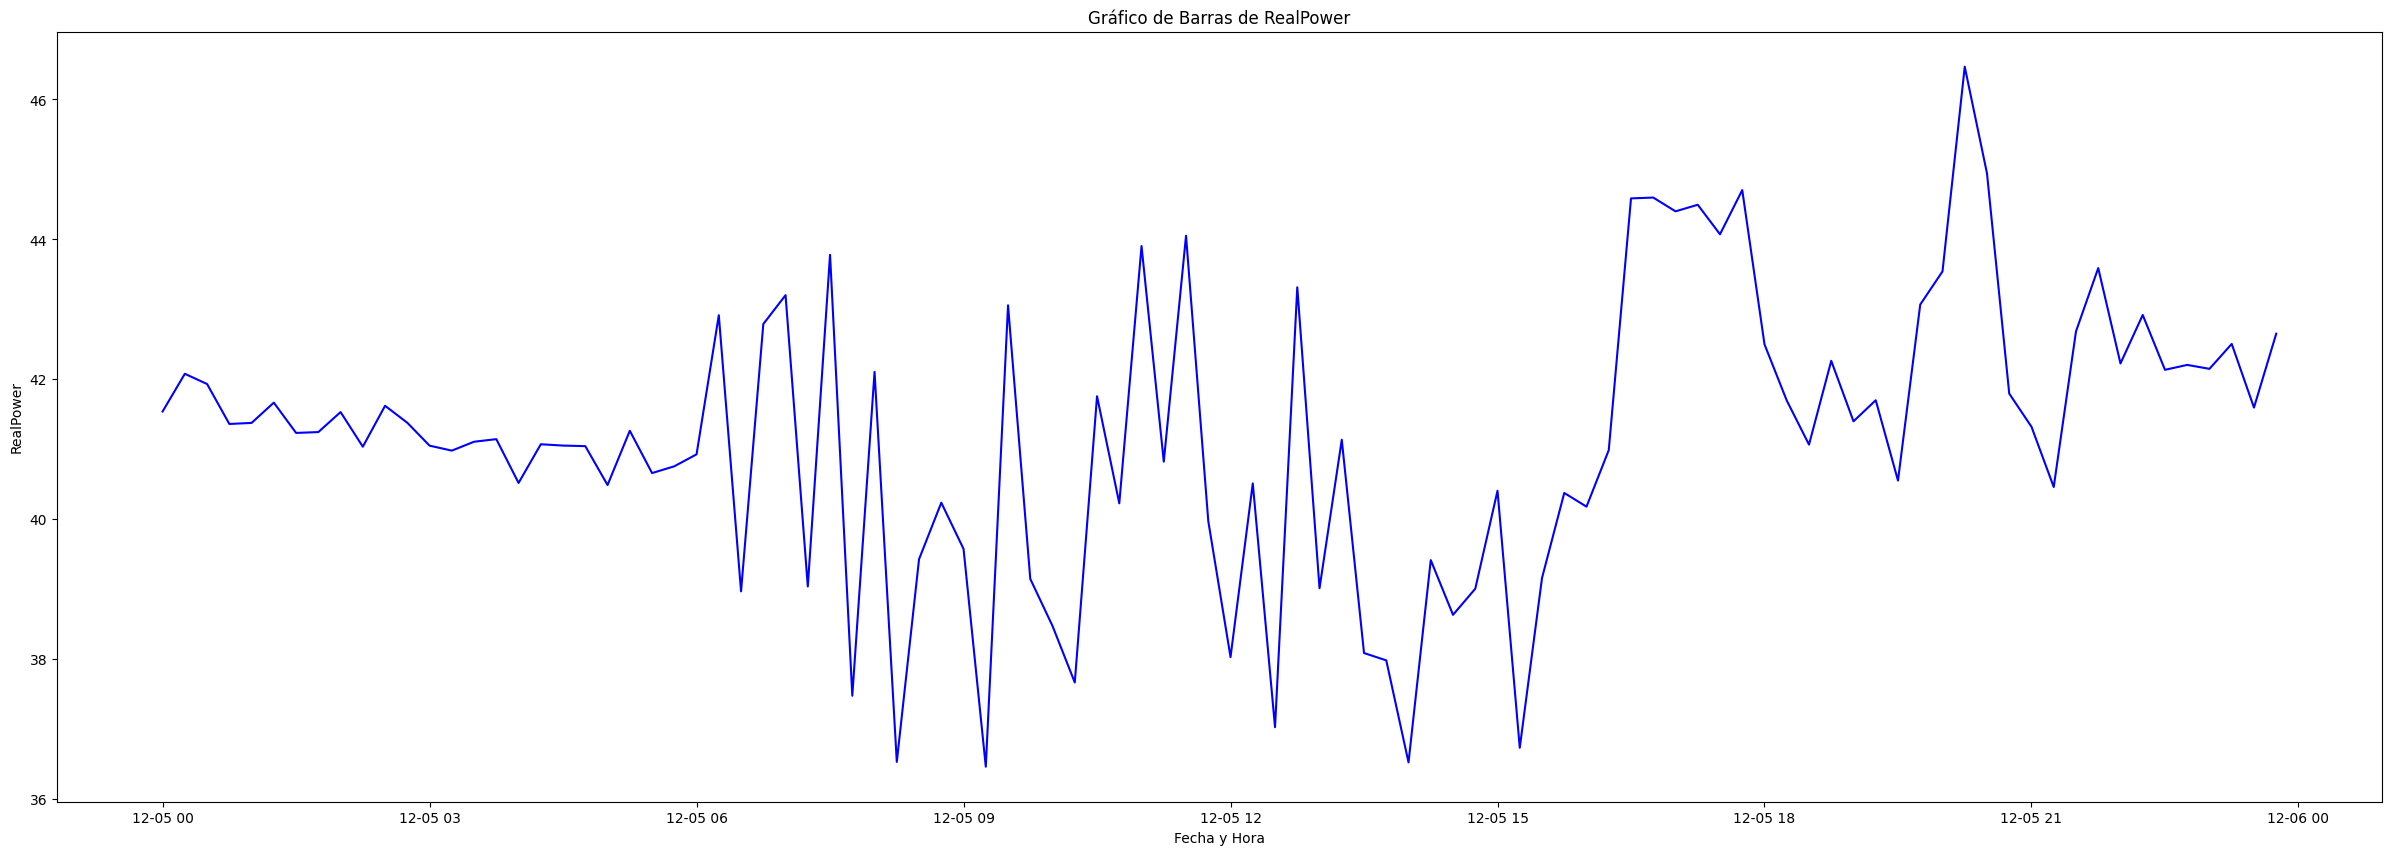

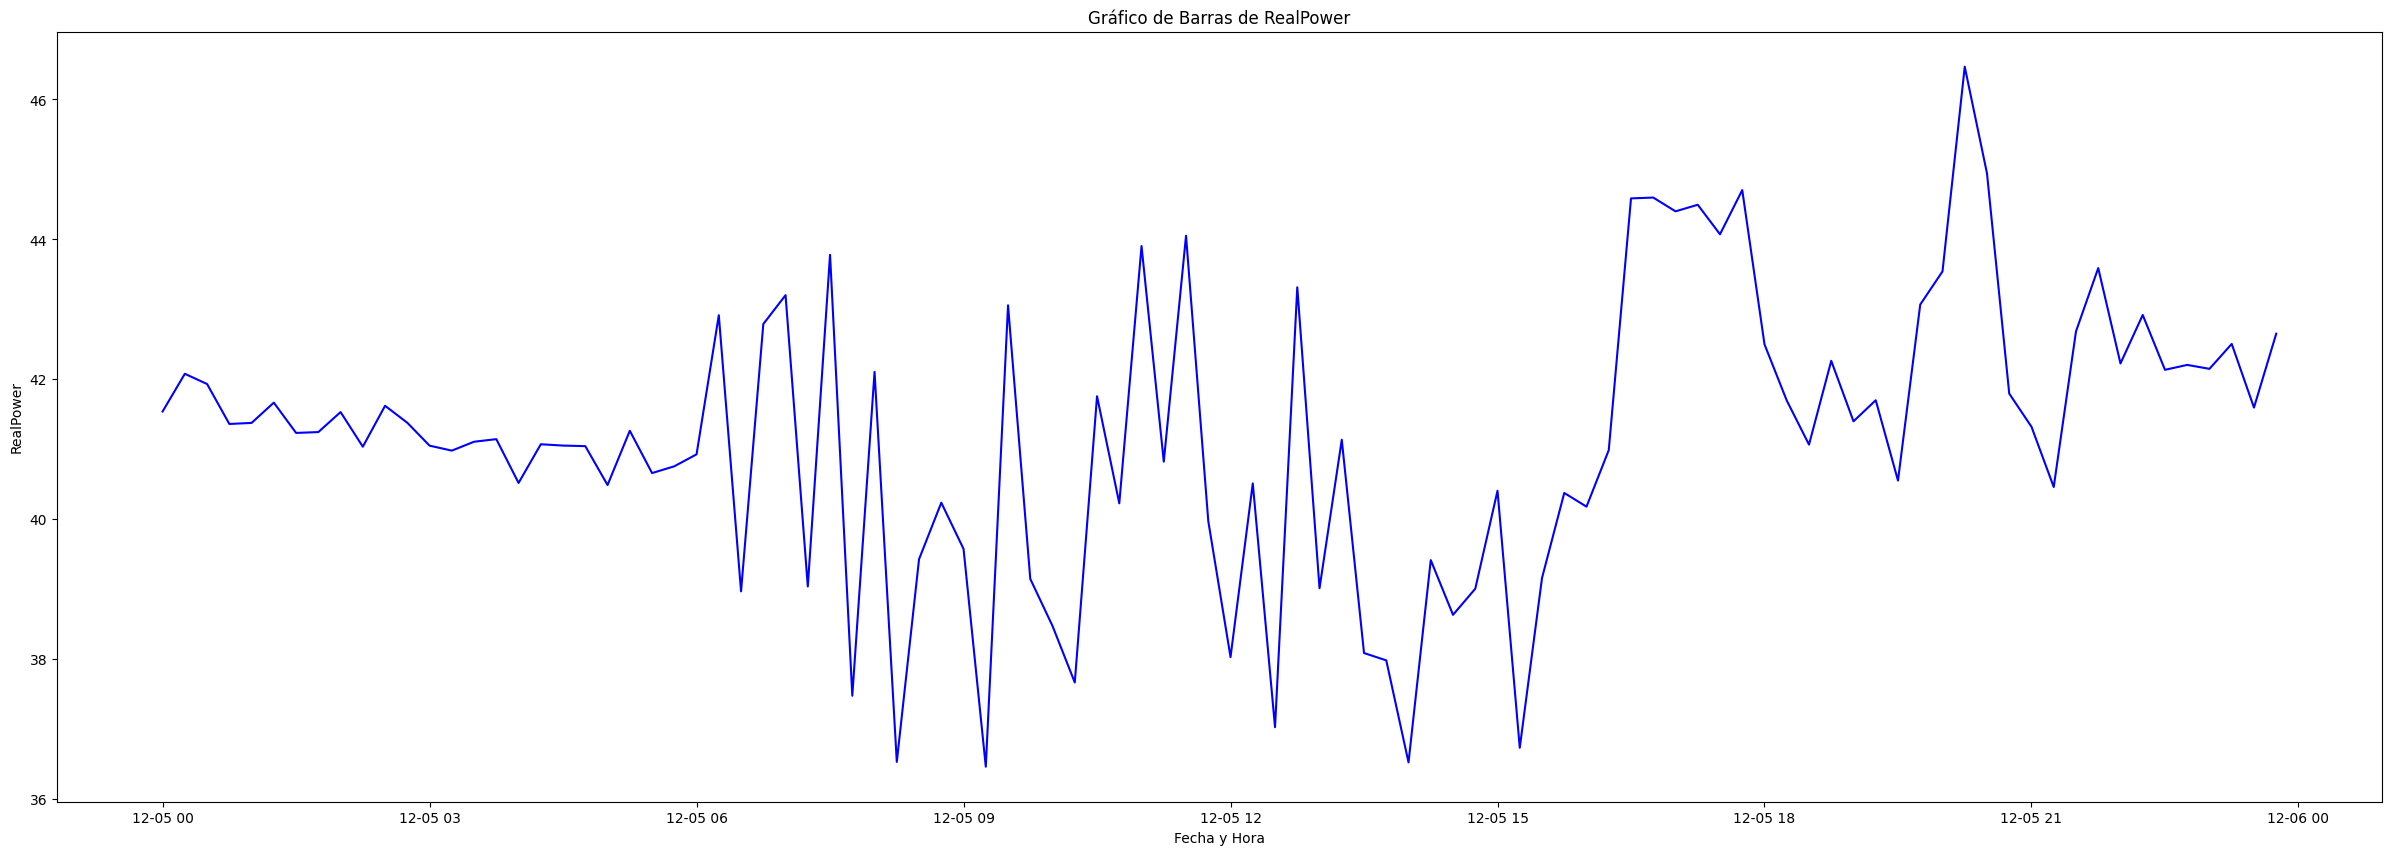

In [359]:
plt.figure(figsize=(30,10))
plt.plot(df_dec_diax['DateTime'], df_dec_diax['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.figure(figsize=(30,10))
plt.plot(df_dec_diay['DateTime'], df_dec_diay['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.figure(figsize=(30,10))
plt.plot(df_dec_diaz['DateTime'], df_dec_diaz['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.figure(figsize=(30,10))
plt.plot(df_dec_diaa['DateTime'], df_dec_diaa['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')

plt.figure(figsize=(30,10))
plt.plot(df_dec_diaa['DateTime'], df_dec_diaa['RealPower'], color='blue')
plt.title('Gráfico de Barras de RealPower')
plt.xlabel('Fecha y Hora')
plt.ylabel('RealPower')


**Promedio de carga por horas al mes**

*Diciembre*

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1051551944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_dec["DateTime"] = pd.to_datetime(df_2019_dec["DateTime"])
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1051551944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_dec['Hora'] = df_2019_dec['DateTime'].dt.hour


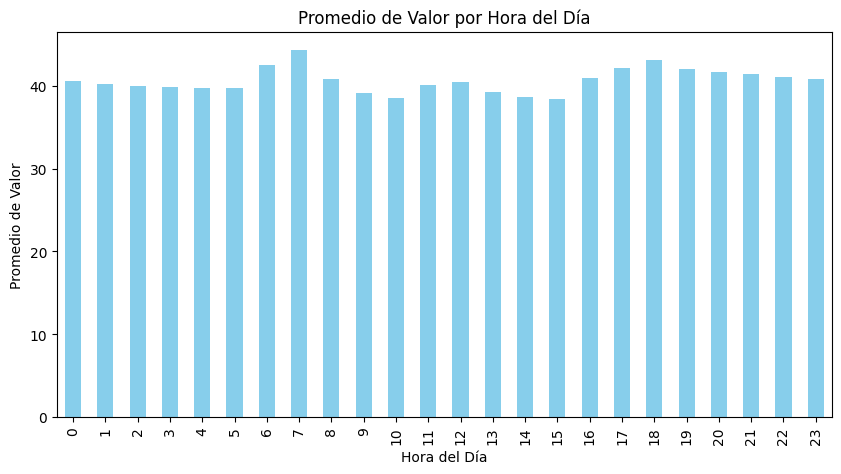

In [360]:
df_2019_dec = df_2019_dec[df_2019_dec['vacaciones'] != 1]

df_2019_dec["DateTime"] = pd.to_datetime(df_2019_dec["DateTime"])

df_2019_dec['Hora'] = df_2019_dec['DateTime'].dt.hour

promedio_por_hora = df_2019_dec.groupby('Hora')['RealPower'].mean()

plt.figure(figsize=(10, 5))
promedio_por_hora.plot(kind='bar', color='skyblue')
plt.title('Promedio de Valor por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Valor')
plt.show()


*Noviembre*

In [361]:
df_nov=pd.DataFrame()

for i in range(len(df)):
    if 2975< i <= 5855:
        df_nov = pd.concat([df_nov, df.iloc[[i]]])

df_2019_dec = df_2019_dec[df_2019_dec['vacaciones'] != 1]

df_nov

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,Fecha,vacaciones,clases_verano
2976,2019-11-30 23:45:00,39.035,11,0,0,1,0,30,2019-11-30,0,0
2977,2019-11-30 23:30:00,38.978,11,0,0,1,0,30,2019-11-30,0,0
2978,2019-11-30 23:15:00,39.189,11,0,0,1,0,30,2019-11-30,0,0
2979,2019-11-30 23:00:00,38.978,11,0,0,1,0,30,2019-11-30,0,0
2980,2019-11-30 22:45:00,39.251,11,0,0,1,0,30,2019-11-30,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5851,2019-11-01 01:00:00,47.705,11,0,0,1,0,1,2019-11-01,0,0
5852,2019-11-01 00:45:00,47.660,11,0,0,1,0,1,2019-11-01,0,0
5853,2019-11-01 00:30:00,47.494,11,0,0,1,0,1,2019-11-01,0,0
5854,2019-11-01 00:15:00,47.440,11,0,0,1,0,1,2019-11-01,0,0


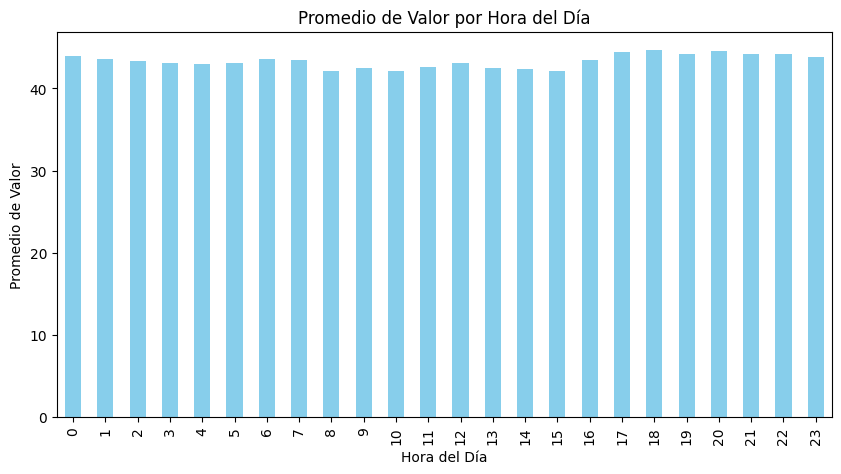

In [362]:
df_nov["DateTime"] = pd.to_datetime(df_nov["DateTime"])

df_nov['Hora'] = df_nov['DateTime'].dt.hour

promedio_por_hora = df_nov.groupby('Hora')['RealPower'].mean()

plt.figure(figsize=(10, 5))
promedio_por_hora.plot(kind='bar', color='skyblue')
plt.title('Promedio de Valor por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Valor')
plt.show()

**Promedio mensual de horas**

*por ejemplo, si el promedio mencual de enero a las 8:00 es 40MW*

*19 de enero tiene 30MW, se hace una comparación para que avise al modelo que es un comportamiento raro*

In [363]:
df_mix["Prom_hora_mes"] = None
df_mix["mayor_promedio"] = None
df_mix['Hora'] = df_mix['DateTime'].dt.hour

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\4268789902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Prom_hora_mes"] = None
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\4268789902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["mayor_promedio"] = None
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\4268789902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [364]:
df_mix['DateTime'] = pd.to_datetime(df_mix['DateTime'])

df_mix['Hora'] = pd.to_numeric(df_mix['Hora'], errors='coerce')

df_mix['Hora_mes'] = df_mix['Hora'].astype(str) + '_' + df_mix['mes'].astype(str)

df_mix['Prom_hora_mes'] = df_mix.groupby('Hora_mes')['RealPower'].transform('mean')

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\2132613589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['DateTime'] = pd.to_datetime(df_mix['DateTime'])
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\2132613589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['Hora'] = pd.to_numeric(df_mix['Hora'], errors='coerce')
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\2132613589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [365]:
for i in range(len(df_mix)):
    
    if df_mix['RealPower'][i] < df_mix['Prom_hora_mes'][i] - 2:

        df_mix.at[i, 'mayor_promedio'] = 1

    elif df_mix['RealPower'][i] >= df_mix['Prom_hora_mes'][i] - 2 and df_mix['RealPower'][i] <= df_mix['Prom_hora_mes'][i]:

        df_mix.at[i, 'mayor_promedio'] = 0

    else:
        df_mix.at[i, 'mayor_promedio'] = 1

del df_mix["Hora_mes"]

df_mix
   

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,Prom_hora_mes,mayor_promedio,Hora
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.184637,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,51.763875,1,1
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0


**Promedio diario de horas**

*Lo mismo de antes pero se agrega el dia*

In [366]:
df_mix["Prom_hora_mes_dia"] = None
df_mix["mayor_promedio_dia"] = None

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\3117994234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["Prom_hora_mes_dia"] = None
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\3117994234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix["mayor_promedio_dia"] = None


In [367]:
df_mix['DateTime'] = pd.to_datetime(df_mix['DateTime'])

df_mix['Hora'] = pd.to_numeric(df_mix['Hora'], errors='coerce')

df_mix['Hora_mes_dia'] = df_mix['dia'].astype(str) + '_' + df_mix['Hora'].astype(str) + '_' + df_mix['mes'].astype(str)

df_mix['Prom_hora_mes_dia'] = df_mix.groupby('Hora_mes_dia')['RealPower'].transform('mean')

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1736308046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['DateTime'] = pd.to_datetime(df_mix['DateTime'])
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1736308046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['Hora'] = pd.to_numeric(df_mix['Hora'], errors='coerce')
C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\1736308046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [368]:
for i in range(len(df_mix)):
    
    if df_mix['RealPower'][i] < df_mix['Prom_hora_mes_dia'][i] - 2:

        df_mix.at[i, 'mayor_promedio_dia'] = 1

    elif df_mix['RealPower'][i] >= df_mix['Prom_hora_mes_dia'][i] - 2 and df_mix['RealPower'][i] <= df_mix['Prom_hora_mes_dia'][i]:

        df_mix.at[i, 'mayor_promedio_dia'] = 0

    else:
        df_mix.at[i, 'mayor_promedio_dia'] = 1

del df_mix["Hora_mes_dia"]

df_mix

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,Prom_hora_mes,mayor_promedio,Hora,Prom_hora_mes_dia,mayor_promedio_dia
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,0
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,1
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,1
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,0
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.184637,0,22,38.70800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,51.763875,1,1,51.05075,1
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,0
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,1
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,1


In [369]:
df_mix['minute'] = df_mix['DateTime'].dt.minute
df_mix

C:\Users\giuliana\AppData\Local\Temp\ipykernel_18436\781902989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mix['minute'] = df_mix['DateTime'].dt.minute


,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,Prom_hora_mes,mayor_promedio,Hora,Prom_hora_mes_dia,mayor_promedio_dia,minute
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,0,45
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,1,30
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,1,15
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,0,0
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.184637,0,22,38.70800,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,51.763875,1,1,51.05075,1,0
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,0,45
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,1,30
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,1,15


In [370]:
df_mix.to_csv("df_mix.csv")

In [371]:
df_mix

,DateTime,RealPower,mes,verano,primavera,otoño,invierno,dia,vacaciones,clases_verano,Hay_Sol,temp,Prom_hora_mes,mayor_promedio,Hora,Prom_hora_mes_dia,mayor_promedio_dia,minute
0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,0,45
1,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,1,30
2,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,1,15
3,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.048847,0,23,38.52075,0,0
4,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0,8.89,40.184637,0,22,38.70800,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-04-01 01:00:00,51.912,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,51.763875,1,1,51.05075,1,0
26396,2019-04-01 00:45:00,50.980,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,0,45
26397,2019-04-01 00:30:00,51.873,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,1,30
26398,2019-04-01 00:15:00,51.186,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,16.10,52.269892,0,0,51.17875,1,15
